In [ ]:
# Crop Recommendation System 🌾

''' This project uses soil and weather parameters to recommend the most suitable crop.  
Data Source: [Kaggle Dataset](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset) '''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
# df.shape 
# df.info()
df.describe()
# df['label'].value_counts()  # check class balance

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
# df.isnull().sum()  # should all be 0


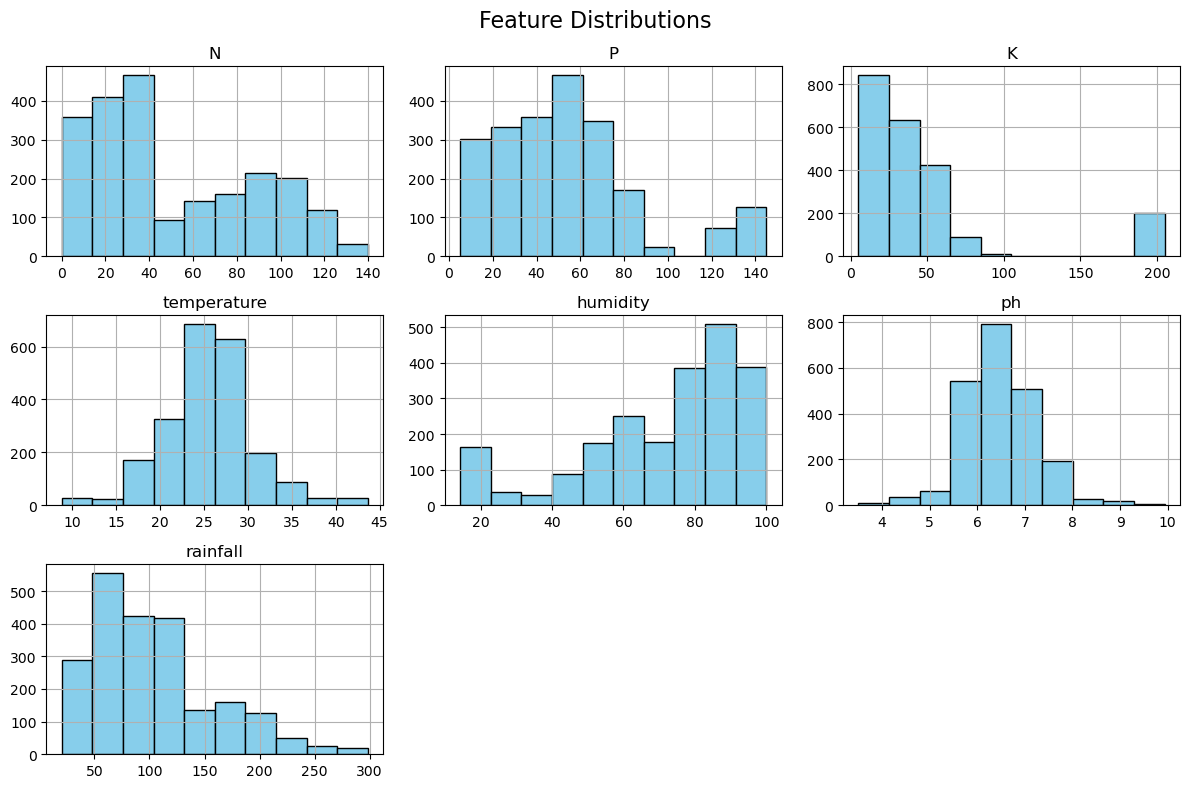

In [7]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

In [10]:
df['K'].value_counts().sort_index(ascending=False).head(10)

K
205    18
204    22
203    22
202    14
201    18
200    14
199    14
198    15
197    24
196    21
Name: count, dtype: int64

In [11]:
df[df['K'] > 150]

,N,P,K,temperature,humidity,ph,rainfall,label
1200,24,130,195,29.996772,81.541566,6.112306,67.125345,grapes
1201,13,144,204,30.728040,82.426141,6.092242,68.381355,grapes
1202,22,123,205,32.445778,83.885049,5.896343,68.739325,grapes
1203,36,125,196,37.465668,80.659687,6.155261,66.838723,grapes
1204,24,131,196,22.032962,83.743728,5.732454,65.344408,grapes
...,...,...,...,...,...,...,...,...
1595,40,120,197,23.805938,92.488795,5.889481,119.633555,apple
1596,25,132,198,22.319441,90.851744,5.732758,100.117344,apple
1597,31,137,196,22.144641,93.825674,6.400321,120.631078,apple
1598,36,144,196,23.651676,94.505288,6.496934,115.361127,apple


In [12]:
df[df['rainfall'] > 250]

,N,P,K,temperature,humidity,ph,rainfall,label
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
10,91,53,40,26.527235,81.417538,5.386168,264.614870,rice
11,90,46,42,23.978982,81.450616,7.502834,250.083234,rice
12,78,58,44,26.800796,80.886848,5.108682,284.436457,rice
16,85,38,41,21.587118,82.788371,6.249051,276.655246,rice
19,88,35,40,23.579436,83.587603,5.853932,291.298662,rice
25,66,53,41,25.075635,80.523891,7.778915,257.003887,rice


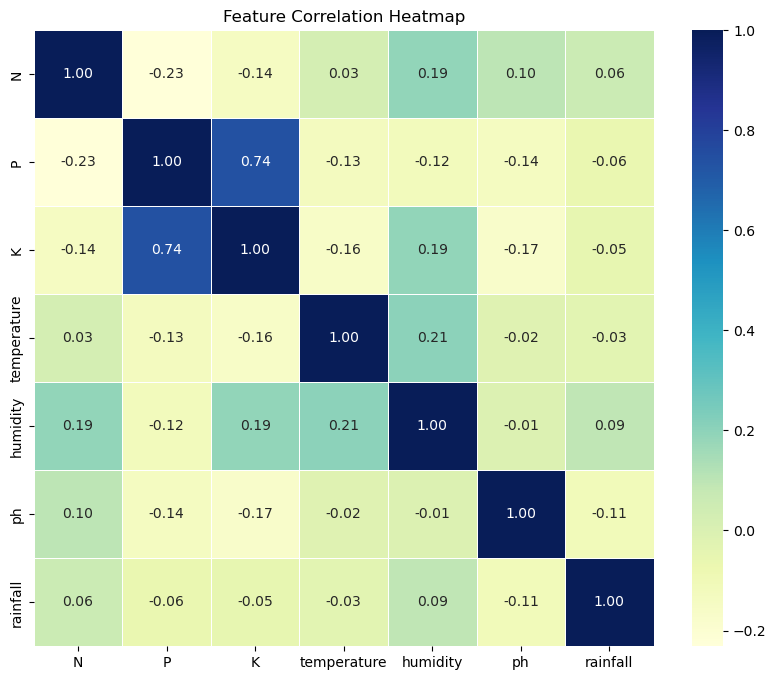

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (excluding 'label')
corr_matrix = df.drop('label', axis=1).corr()

# Set plot size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


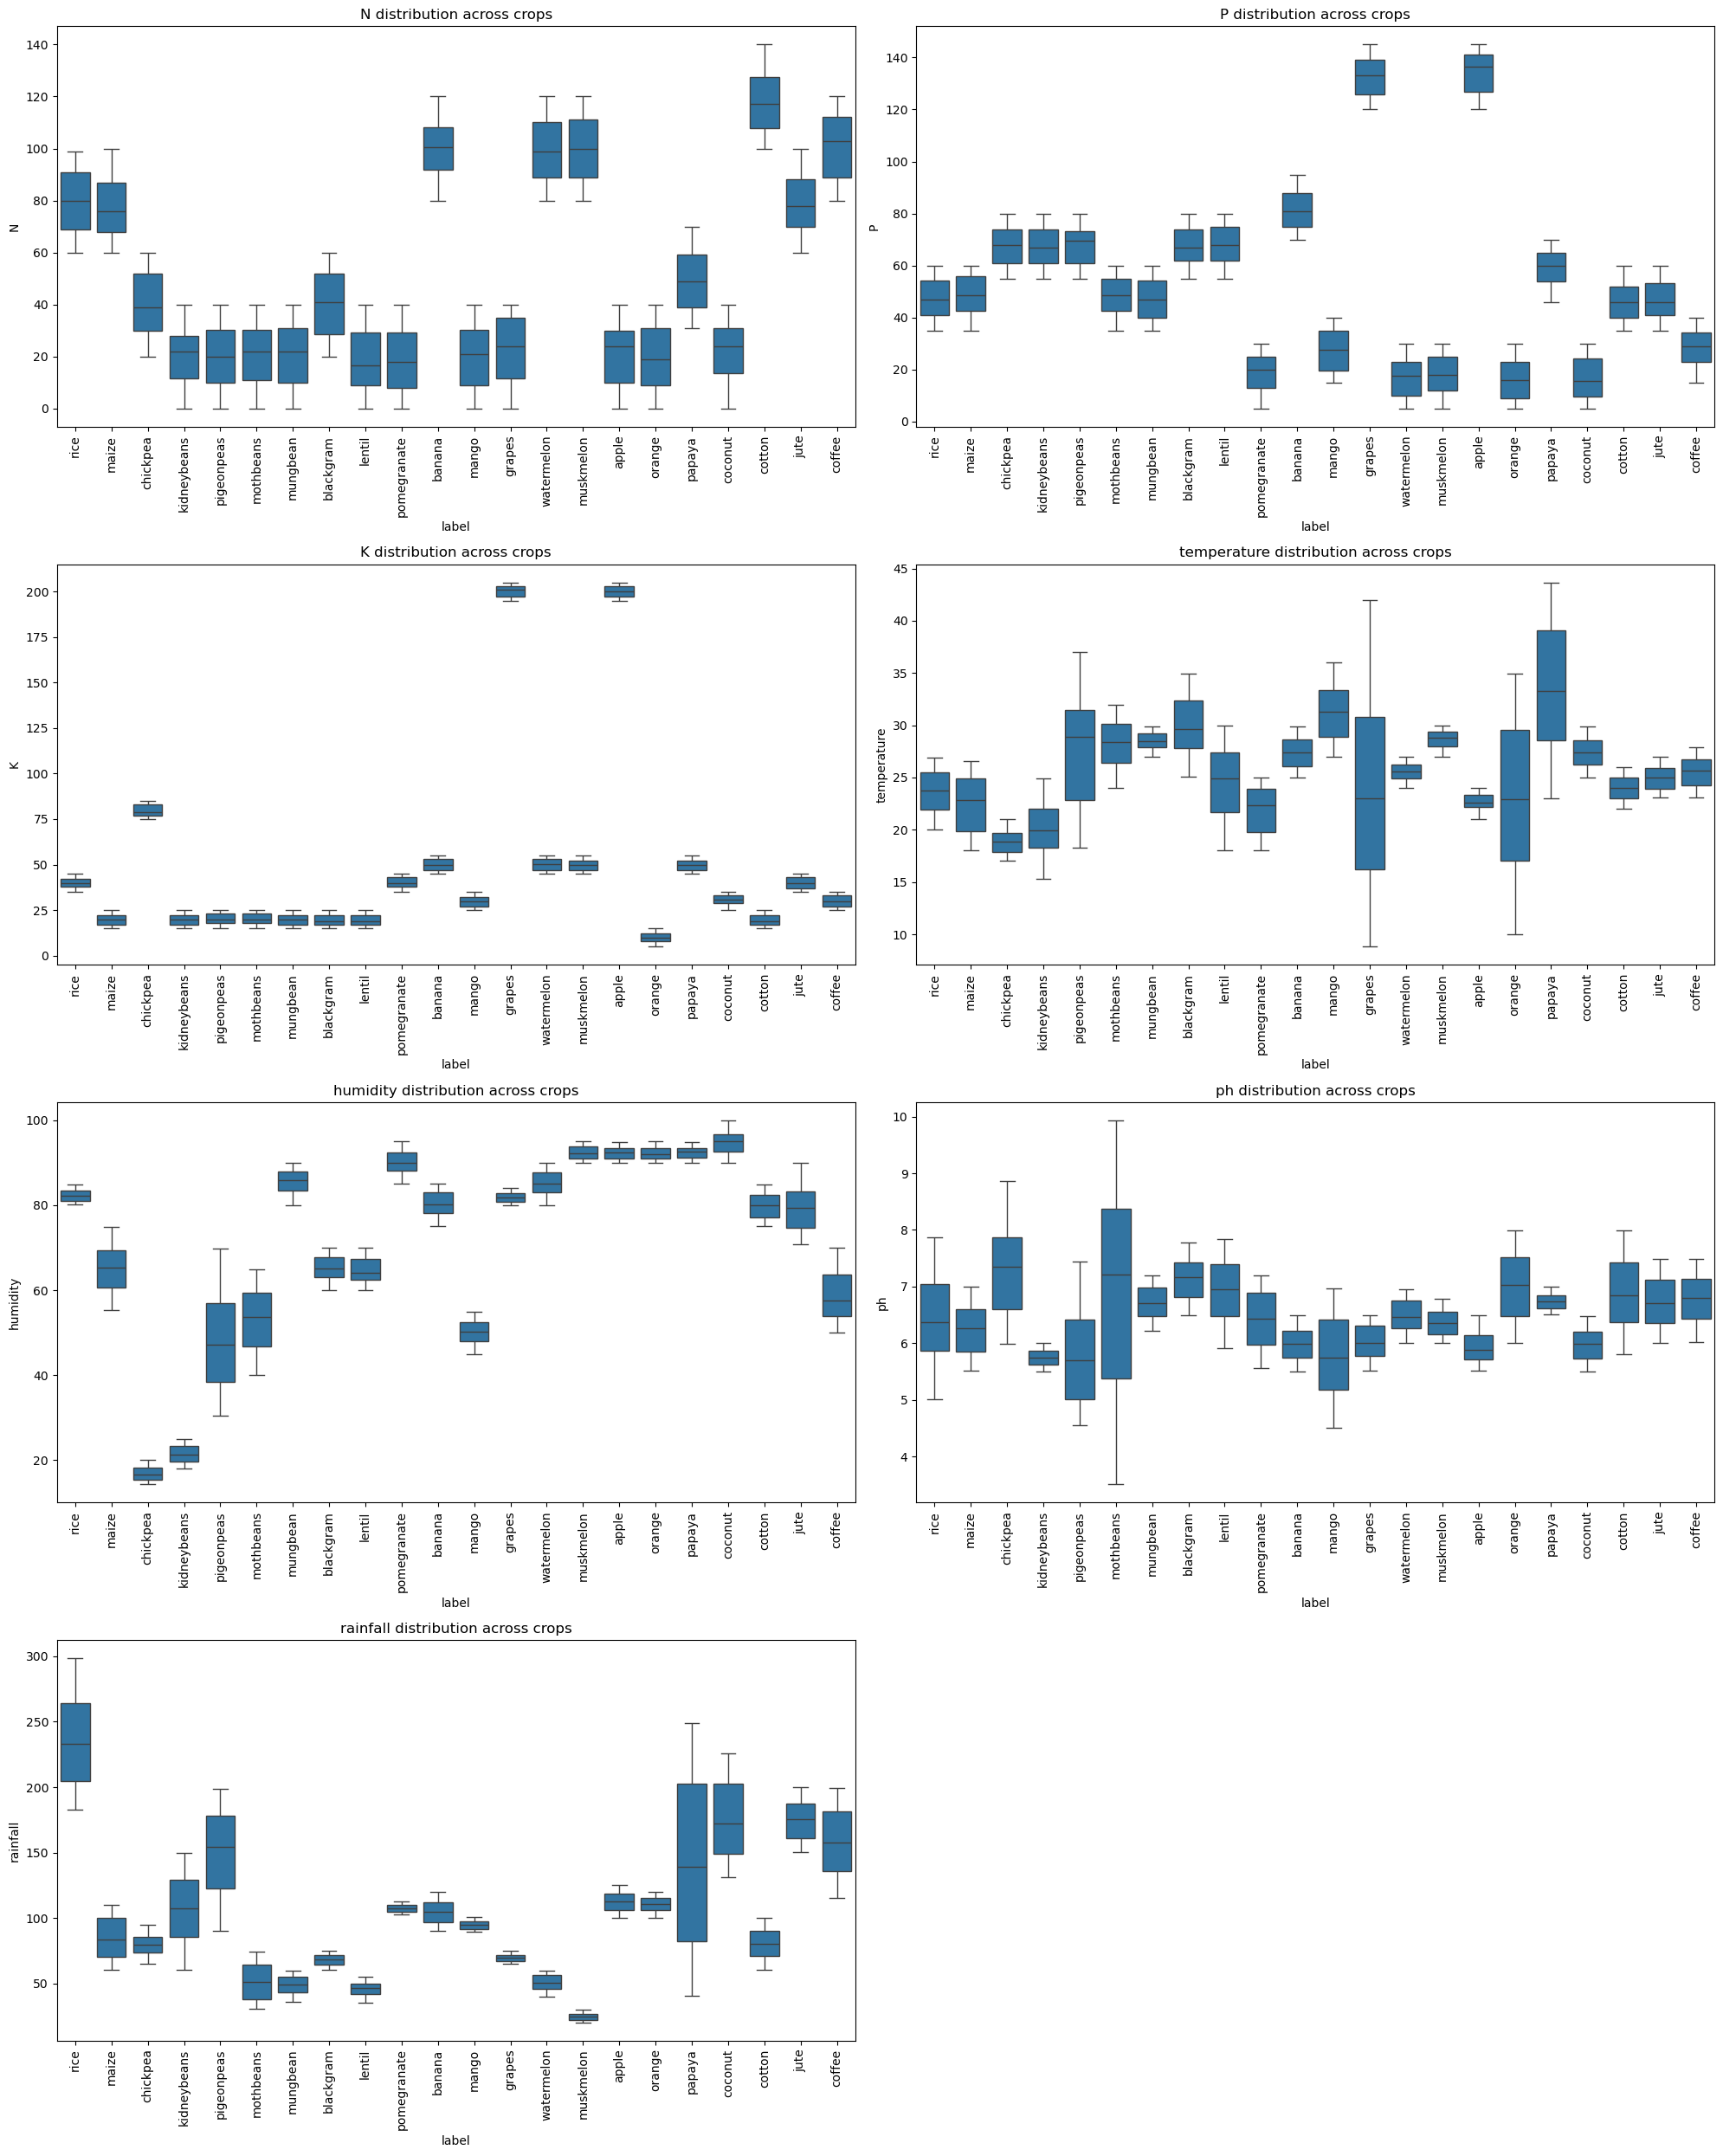

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
plt.figure(figsize=(20, 25))

for i, feature in enumerate(features):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x='label', y=feature, data=df)
    plt.xticks(rotation=90)
    plt.title(f'{feature} distribution across crops')

plt.tight_layout()
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Initialize the encoder
le = LabelEncoder()

# Step 2: Fit and transform the 'label' column
df['label_encoded'] = le.fit_transform(df['label'])

# (Optional) View the mapping of crop names to numbers
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)


{'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}


In [17]:
from sklearn.model_selection import train_test_split

# Step 1: Features and Target
X = df.drop(columns=['label', 'label_encoded'])  # input features
y = df['label_encoded']                          # target crop category

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [18]:
from sklearn.preprocessing import StandardScaler

# Step 1: Initialize the scaler
scaler = StandardScaler()

# Step 2: Fit on training data, and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9727272727272728

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        20
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        20
           8       0.83      1.00      0.91        20
           9       1.00      1.00      1.00        20
          10       0.94      0.85      0.89        20
          11       1.00      0.95      0.97        20
          12       0.95      1.00      0.98        20
          13       0.90      0.90      0.90        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00    

In [26]:
# import pandas as pd

# # Step 1: Your input (still just a list)
# new_data = [[90, 42, 43, 20.87, 82.00, 6.5, 202.93]]

# # Step 2: Convert to DataFrame with same columns as training data
# new_data_df = pd.DataFrame(new_data, columns=X.columns)

# # Step 3: Apply scaling
# new_data_scaled = scaler.transform(new_data_df)

# # Step 4: Predict the encoded label
# predicted_label = model.predict(new_data_scaled)

# # Step 5: Decode the label to get the actual crop name
# crop_name = le.inverse_transform(predicted_label)

# # Final output
# print("✅ Recommended crop:", crop_name[0])



✅ Recommended crop: rice


In [27]:
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    import pandas as pd

    # Step 1: Construct the input as a DataFrame
    input_data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                              columns=X.columns)

    # Step 2: Scale the input using the fitted scaler
    input_scaled = scaler.transform(input_data)

    # Step 3: Predict using the trained model
    predicted_label = model.predict(input_scaled)

    # Step 4: Decode the numeric label to crop name
    crop_name = le.inverse_transform(predicted_label)

    # Step 5: Return result
    return crop_name[0]


In [29]:
result = predict_crop(90, 42, 43, 20.87, 82.00, 6.5, 202.93)
print("✅ Recommended crop:", result)

✅ Recommended crop: rice


In [30]:
# import joblib

# joblib.dump(model, "model.pkl")
# joblib.dump(scaler, "scaler.pkl")
# joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']